## Общая информация о данных

Требуется выявить определяющие успешность игры закономерности,что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в интернет-магазине «Стримчик».

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
#print (pd.__version__)
#Для работы некоторых функций, требуются актуальные версии pandas и seaborn
#!pip3 install --upgrade pandas
#!pip install seaborn --upgrade

In [4]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.describe(include = 'object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [8]:
df.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


Проверим, есть ли в данных дубли

In [9]:
df.duplicated().sum()

0

**Вывод:**
- данные не содержат дупликатов
- данные содержат много пропусков, которые требуют обработки
- тип данных в столбцах не соотвествует типу контента в них, требуется изменнение типов данных

## Предобработка данных

### Переименование столбцов

Приведем к нижнему регистру все названия столбцов

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

По имеющимся данным невозможно восстановить пропуски в числовых столбцах 'year_of_realese','critic_score', данная информация должна быть дополнена из внешних источников.

Проанализируем столбец 'user_score', пропуски в нём также невозможно восстановить, но нужно проверить, почему этот столбец не числового типа, а типа object

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных с оценками присутствует строка 'tbd' - To Be Discussed "подлежит обсуждения", для анализа это обозначает пропуски, заменим это значение на nan.

In [13]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Заменим пропуски в столбце 'rating', т.к. восстановить их невозможно, заменим их значением 'unknown' 

In [14]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В столбце 'name' и 'genre' мало пропусков, проанализируем их.

In [15]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


Неизвестны названия игр на платформе GEN, 1993, стоит отметить, 
- на строке 659 очень популярная игра в Америке и Европе
- на строке 14244 игра имеющая, небольшую популярность в Японии


Посмотрим, какие игры были с 1992 на данной платформе и так сильно популярны в Америке, с более 1 млн продаж.

In [16]:
df.query('(year_of_release>1991)& (na_sales >1) & (platform == "GEN")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,unknown
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,unknown
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,unknown
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,unknown
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,unknown
1453,Mortal Kombat 3,GEN,1994.0,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,unknown


В эти годы под платформу GEN высокую популярность имели версии игры Mortal Kombat, NBA Jam и Sonic. Стоит отметить, что:
- в базе есть только Mortal Kombat - 1992 и Mortal Kombat 3 - 1994
- Sonic всегда имел некоторую популярность в Японии

Вероятнее всего на строке 659 именно Mortal Kombat 2, внешние источники подтверждают, что год выпуска 1993

In [17]:
df.iloc[659,[0,3]] = ["Mortal Kombat 2", "Fighting"]
df.iloc[659,[0,3]]

name     Mortal Kombat 2
genre           Fighting
Name: 659, dtype: object

Проанализируем игры с 1992, которые имели продажи только в Японии на платформе GEN

In [18]:
df.query('jp_sales != 0 & platform == "GEN" & na_sales == 0').sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.0,0.0,0.05,0.0,NaN,NaN,unknown
14132,Castlevania Bloodlines,GEN,1994.0,Platform,0.0,0.0,0.04,0.0,NaN,NaN,unknown
11660,Dragon Slayer: The Legend of Heroes,GEN,1994.0,Role-Playing,0.0,0.0,0.08,0.0,NaN,NaN,unknown
12984,Dynamite Headdy,GEN,1993.0,Platform,0.0,0.0,0.05,0.0,NaN,NaN,unknown
9787,Ecco the Dolphin,GEN,1992.0,Adventure,0.0,0.0,0.12,0.0,NaN,NaN,unknown
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.0,0.0,0.07,0.0,NaN,NaN,unknown
9563,Gunstar Heroes,GEN,1992.0,Shooter,0.0,0.0,0.13,0.0,NaN,NaN,unknown
14085,J-League Pro Striker 2,GEN,1994.0,Sports,0.0,0.0,0.04,0.0,NaN,NaN,unknown
9000,"Lunar 2: Eternal Blue(sales, but wrong system)",GEN,1994.0,Role-Playing,0.0,0.0,0.14,0.0,NaN,NaN,unknown
14488,Puzzle & Action: Tant-R,GEN,1994.0,Misc,0.0,0.0,0.03,0.0,NaN,NaN,unknown


Нельзя однозначно определить, что это за игра, поэтому значения заменим на 'unknown'

In [19]:
df.iloc[14244,[0,3]] = "unknown"
df.iloc[14244,[0,3]]

name     unknown
genre    unknown
Name: 14244, dtype: object

### Изменение типов данных

- В столбцах 'year_of_release','critic_score' данные типа float, это связано с тем что в столбце есть пропуски типа NaN. Переведём данные столбцы, к целочисленному типу. 
- Данные в столбце 'user_score' ранее содержали строку, теперь здесь только вещественные числа, а значит столбец можно привести к типу float

In [20]:
df['year_of_release'] = df['year_of_release'].convert_dtypes()
df['critic_score'] = df['critic_score'].convert_dtypes()
df['user_score'] = df['user_score'].astype('float')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

### Подсчёт общего количества продаж

In [21]:
df['all_sales'] = df[["na_sales","eu_sales","jp_sales","other_sales"]].sum(axis=1)
df[["na_sales","eu_sales","jp_sales","other_sales","all_sales"]]

,na_sales,eu_sales,jp_sales,other_sales,all_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...
16710,0.00,0.00,0.01,0.00,0.01
16711,0.00,0.01,0.00,0.00,0.01
16712,0.00,0.00,0.01,0.00,0.01
16713,0.01,0.00,0.00,0.00,0.01


## Исследовательский анализ

In [22]:
sns.__version__

'0.11.1'

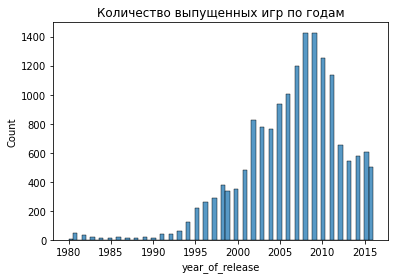

In [23]:
ax = sns.histplot(data=df, x="year_of_release",bins=70)
ax.set_title("Количество выпущенных игр по годам")
sns.set(rc={'figure.figsize':(10,6)})

In [24]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Самое большое количество игр выпускалось в 2008 и 2009 годах.

Посмотрим игры на какие платформы, имеют больше всего продаж.

In [25]:
def get_top_platform(data, count):
    top_platform = data.groupby('platform')['all_sales'].sum().sort_values(ascending = False).head(count)
    data = data.query('platform in @top_platform.index')
    platform_year = data.groupby(['platform','year_of_release'])['all_sales'].sum().reset_index()
    ax = sns.lineplot(data=platform_year, x="year_of_release", y= 'all_sales', hue ="platform")
    ax.set_title("Продажи по годам популярных платформ")
    return platform_year
    

,platform,year_of_release,all_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
5,DS,2008,145.31
6,DS,2009,119.54
7,DS,2010,85.02
8,DS,2011,26.18
9,DS,2012,11.01


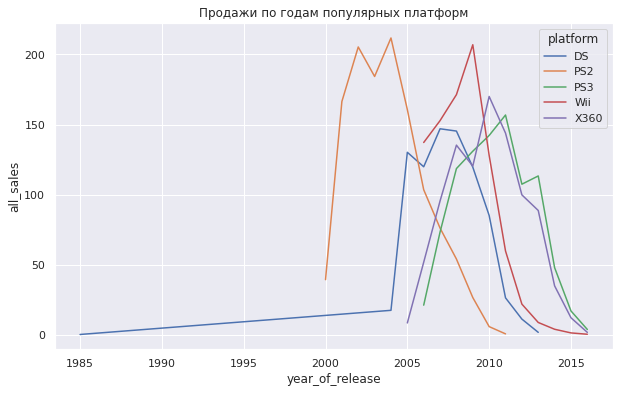

In [26]:
get_top_platform(df, 5).head(10)

- В среднем игры под платформу продаются в течение 10 лет
- Для платформы PC продажи есть всегда с 1985
- Между пиками продаж под новые версии PS 5-6 лет
- Стоит отметить, что пик всех продаж по платформам приходится на середину цикла продаж, за исключением долгоживущих платформ "DS" и "PC"

Для прогноза на 2017 год, актуальный период можно брать за последние 5 лет с 2012 по 2016.

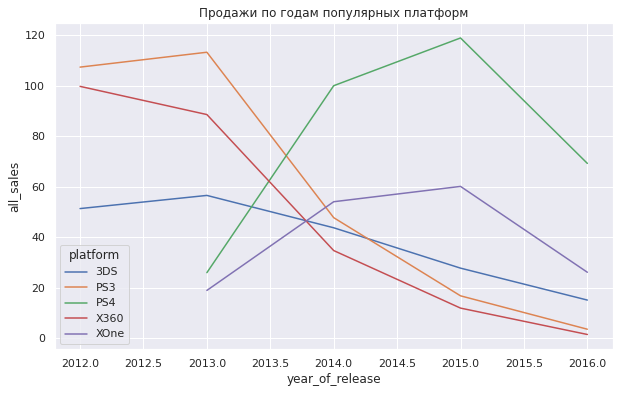

In [27]:
df_actually = df[df['year_of_release'] >= 2012]
df_actually_top = get_top_platform(df_actually,5)

К 2017 году продажи по самым популярным платформам за последние 5 лет находятся в стадии падения и прошли свой пик.

Те не менее даже в падении лидируют PS4, XOne

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

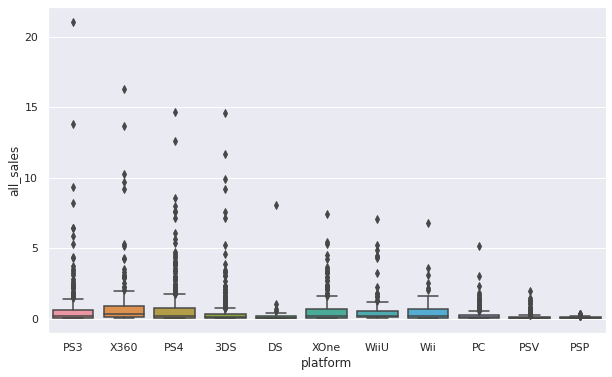

In [28]:
sns.boxplot(x='platform', y='all_sales', data=df_actually)

[(0.0, 2.0)]

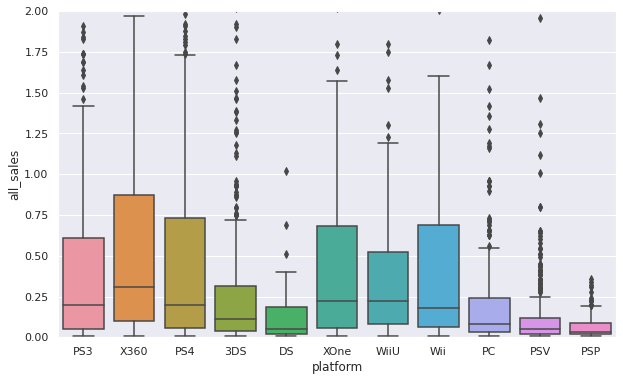

In [29]:
ax = sns.boxplot(x='platform', y='all_sales', data=df_actually)
ax.set(ylim=(0,2))

Как видно из графиков данные распределены неравномерно, наибольшее количество продаж приносят единичные игры.
 - Медианные значения по всем платформам распологаются в пределах 0.4 млн продаж.
 - При это видим для всех платформ тенденцию смещения медианных значений к 1 квартилю. Что говорит о том, что на всех платформах есть единичные игры на которые приходятся большая доля продаж и которые влият на рынок в целом 

Самая популярная платформа PS3, рассмотрим как кореллириуют отзывы пользователей и критиков и продажи

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

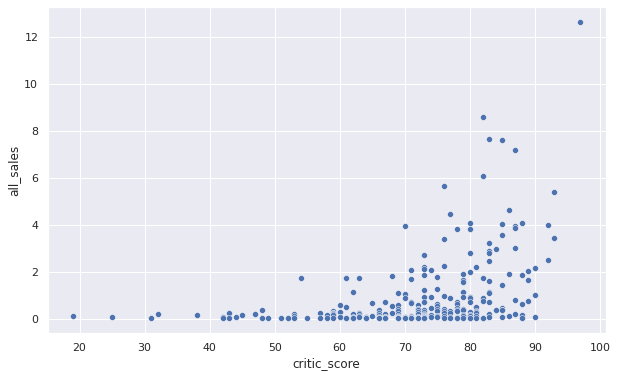

In [30]:
df_ps4 = df_actually.query('platform == "PS4"')[['name','critic_score', 'user_score', 'all_sales']]
sns.scatterplot(data = df_ps4, x = 'critic_score', y = 'all_sales')

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

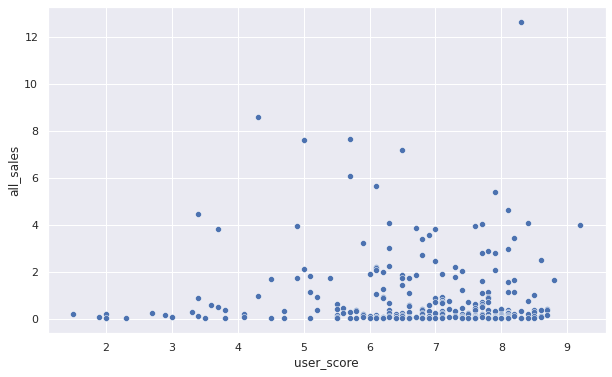

In [31]:
sns.scatterplot(data = df_ps4, x = 'user_score', y = 'all_sales')

<AxesSubplot:>

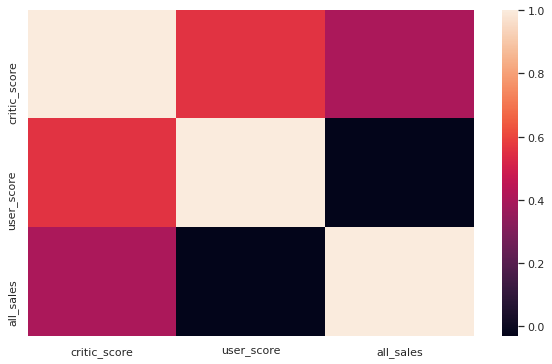

In [32]:
sns.heatmap(df_ps4.corr())

**Выводы**: есть слабая линейная связь между оценкой критиков и продажами игр на платформе PS4, между оценкой пользователей и продажами игр, связь не наблюдается.

Проверим данный вывод на примере других топовых платформах

In [33]:
top3_list = df_actually_top.groupby('platform').sum().reset_index().sort_values('all_sales',ascending = False).head(3)['platform']
top3_list
df_actually.query('platform in @top3_list')[['name','all_sales','critic_score','user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.363041,-0.007889
critic_score,0.363041,1.000000,0.551451
user_score,-0.007889,0.551451,1.000000


**Выводы:** для ТОП-3 популярных платформ, зависимость продаж от оценки критиков слабее чем для самой популярной платформы

In [34]:
df_actually.groupby('genre')['all_sales'].agg(["median","mean","sum","count","max"]).sort_values(by = "median",ascending = False)

,median,mean,sum,count,max
genre,,,,,
Shooter,0.440,1.296723,304.73,235,14.63
Sports,0.240,0.675634,181.07,268,8.58
Platform,0.210,0.717647,61.00,85,9.90
Role-Playing,0.140,0.521081,192.80,370,14.60
Racing,0.140,0.465217,53.50,115,7.09
Fighting,0.130,0.408165,44.49,109,7.55
Action,0.120,0.427856,441.12,1031,21.05
Misc,0.120,0.442917,85.04,192,9.18
Simulation,0.120,0.439000,35.12,80,9.17


**Выводы:** 
- ТОП3 продаваемых игр жанра Action, Shooter, Role-Playing
- ТОП3 наименее продаваемых игр жанра Adventure, Strategy, Puzzle

Чтобы говорить о прибыльности жанров, недостаточно исходной информации, т.к. неизвестна прибыль с одной игры

## Портрет пользователя каждого региона

In [35]:
def view_top5(index):
    pivot_sales = pd.pivot_table(data = df_actually,
              values=['na_sales','eu_sales','jp_sales'],
               index = index, aggfunc = 'sum')
    for column in pivot_sales.columns:
        print(f'Топ {index} в {column}')
        top_platform_sales = pivot_sales.sort_values(column, ascending = False)[column].head(5)
        top_platform_sales.plot.bar()
        plt.show()

Топ platform в eu_sales


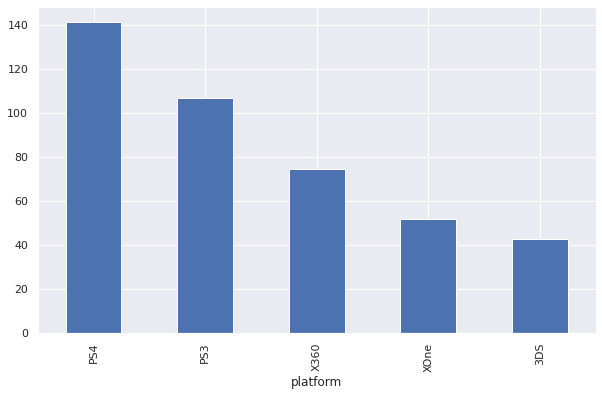

Топ platform в jp_sales


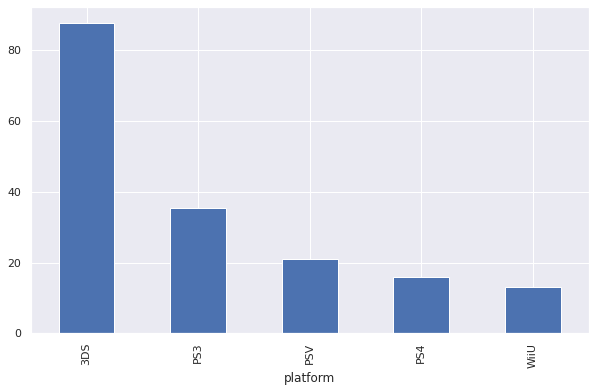

Топ platform в na_sales


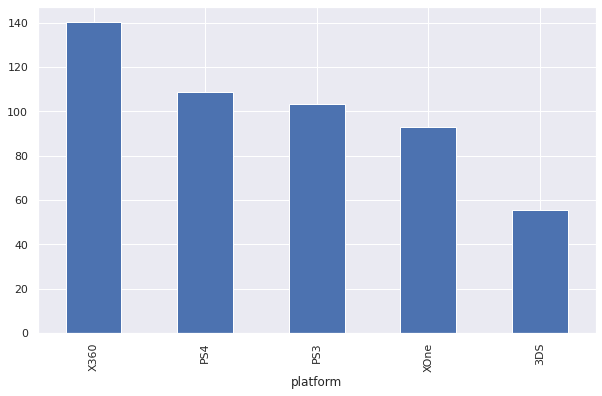

In [36]:
view_top5('platform')

Топ genre в eu_sales


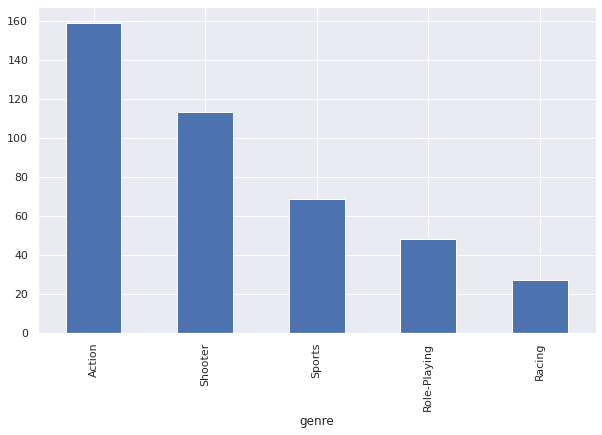

Топ genre в jp_sales


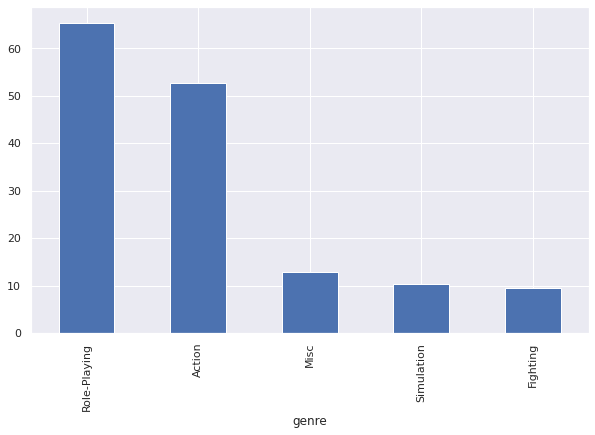

Топ genre в na_sales


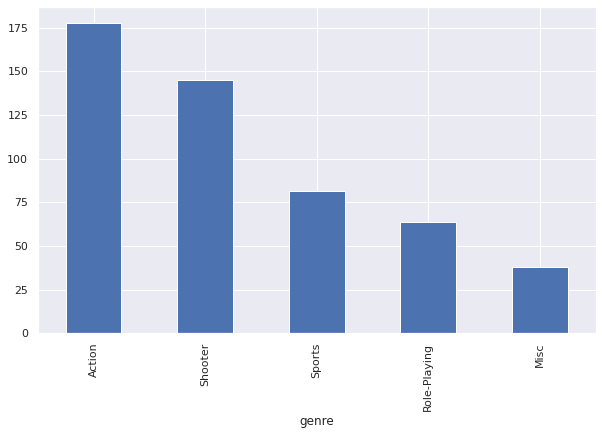

In [37]:
view_top5('genre')

**Выводы**
- Интересы пользователей из Японии существенно отличаются, от пользователей из Северной Америки и Европы. Самая популярная платформа 3DS, которая в Европе и Америке занимает лишь 5 место. Самый популярный жанр "Ролевая игра", в то время как в Европе и Америке, этот жанр занимает 4 место.

- Самые популярные жанры в Америке и Европе одинаковые, лишь на 5 месте различные жанры в Европе - это Гонки, в Америке  - Misc. 

- ТОП-5 платформ в Америке и Европе составляют одинаковые платформы, но ТОП-3 отранжированы по разному. Если в Америке самая популярная платформа X360, то в Европе она лишь на 3 месте, а на первом PS4.

**Американские и Европейские пользователи схожи в своих интересах, в то время как японский рынок более специфичен и имеет свои интересы**

In [38]:
pivot_sales = pd.pivot_table(data = df_actually,
              values=['na_sales','eu_sales','jp_sales'],
               index = 'rating', aggfunc = 'sum')
pivot_sales

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


array([<AxesSubplot:ylabel='Европа'>, <AxesSubplot:ylabel='Япония'>,
       <AxesSubplot:ylabel='Северная Америка'>], dtype=object)

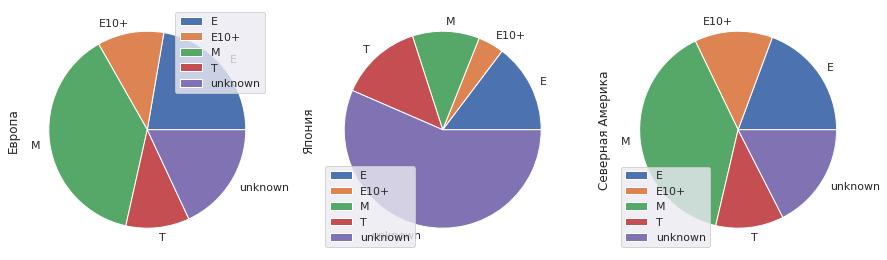

In [72]:
pivot_sales.columns = ["Европа","Япония", "Северная Америка"]
pivot_sales.plot.pie(subplots=True,figsize=(15, 9))

**Выводы**
- В Европе и Америке наибольшей популярностью обладают игры с рейтингом M для взрослых. Вторые по продажам игры категории E "для всех" от 6 лет.
- Для самых продаваемых игр в Японии, рейтинг не определен. ESRB не оценивал игры расчитанные на японский рынок

## Проверка гипотез

**Проверим гипотезу:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Нулевая гипотеза:* Средние пользовательские рейтинги платформы Xbox One и PC одинаковые

*Альтернативная гипотеза:* Средние пользовательские рейтинги выборки платформы Xbox и PC отличаются

In [40]:
choose_xbox = df_actually.query('platform == "XOne"')['user_score']
choose_pc = df_actually.query('platform == "PC"')['user_score']
choose_xbox = choose_xbox.dropna()
choose_pc = choose_pc.dropna()
print(f'Размер выборки рейтингов на платформе Xbox One {len(choose_xbox)}')
print(f'Размер выборки рейтингов на платформе PC {len(choose_pc)}')

Размер выборки рейтингов на платформе Xbox One 182
Размер выборки рейтингов на платформе PC 206


Размеры выборок достаточные для проведения t-test

Оценим дисперсию данных выборок

In [41]:
print(f'Дисперсия рейтингов по платформе Xbox One {choose_xbox.var()}')
print(f'Дисперсия рейтингов по платформе PC {choose_pc.var()}')

Дисперсия рейтингов по платформе Xbox One 1.9069968429360695
Дисперсия рейтингов по платформе PC 2.770443997158418


В тесте Стьюдента equal_var будем задавать как False

In [42]:
alpha = .05
results = st.ttest_ind(
    choose_xbox, 
    choose_pc, equal_var = False)
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Нельзя отвергнуть гипотезу о том, что средние пользовательские рейтинги платформы Xbox One и PC одинаковые**

Проверим гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [43]:
choose_action = df_actually.query('genre == "Action"')['user_score']
choose_sports = df_actually.query('genre == "Sports"')['user_score']
choose_action = choose_action.dropna()
choose_sports = choose_sports.dropna()
print(f'Размер выборки рейтингов жанра Action {len(choose_action)}')
print(f'Размер выборки рейтингов жанра Sports {len(choose_sports)}')

Размер выборки рейтингов жанра Action 523
Размер выборки рейтингов жанра Sports 195


Выборки достаточные для проведения теста Стьюдента t-test, но  при этом существенно различаются поэтому параметр equal_var возьмём равным False

In [44]:
alpha = .05
results = st.ttest_ind(
    choose_action, 
    choose_sports, equal_var = False)
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

4.24307776572644e-20
Отвергаем нулевую гипотезу


**Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports - разные, не может быть отвергнута**

## Общий вывод

- В среднем новая платформа достигает пика продаж в течение первых 5 лет и живёт около 10 лет
- Все популярные платформы на 2016 год находятся в стадии спада и прошли свой пик продаж
- При проведении рекламной компании, важно определить регион аудитории, предпочтения в Америке и Европе, существенно отличаются от аудитории Японии
    - в Америке самая популярная платформа X360, а жанр игры Action
    - в Европе самая популярная платформа PS4, а жанр игры Action
    - в Японии самая популярная платформа 3DS, а жанр игры Role-Playing

Рекомендую при рекламе продукции ориентироваться именно на Американский и Европейский рынок, т.к. их охват значительно больше. В стадии роста по продажам на полный 2015 год находятся платформы PS4 и XOne, игры под эти плафтормы лучше продвигать, также при продвижении стоит учитывать рейтинги игр, для выбора наиболее продаваемого продукта